# Spectrogram Proof of Concept


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# # Calculate and plot spectrogram for a wav audio file
# def graph_spectrogram(wav_file):
#     rate, data = get_wav_info(wav_file)
#     nfft = 200 # Length of each window segment
#     fs = 8000 # Sampling frequencies
#     noverlap = 120 # Overlap between windows
#     nchannels = data.ndim
#     if nchannels == 1:
#         pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
#     elif nchannels == 2:
#         pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
#     return pxx

## Make sure we understand what Spectorgram does
Our nanopore reads are positive integers. Usually spectorgrams are generated from audio files. Audio is a sinusoidal wave form centered around zero.

### play around with the matplotlib demo
[matplotlib.pyplot.specgram demo](https://matplotlib.org/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py)

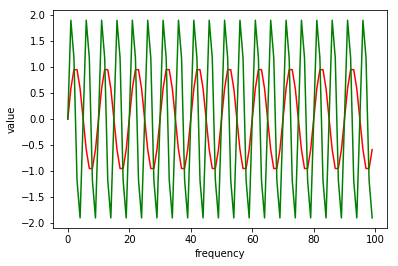

In [3]:
dt = 0.002 # 0.0005 as dt gets smaller the num samples increases
t = np.arange(0.0, 20.0, dt)
s1 = 1 * np.sin(2 * np.pi * 50 * t)
s2 = 2 * np.sin(2 * np.pi * 100 * t)
s3 = 3 * np.sin(2 * np.pi * 150 * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(s1[0:100], 'r')
ax.plot(s2[0:100], 'g') 
ax.set_xlabel("frequency")
ax.set_ylabel("value")
plt.show()

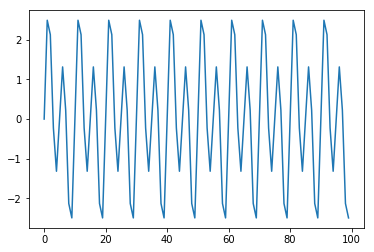

In [4]:
plt.plot(s1[0:100] + s2[0:100]) 

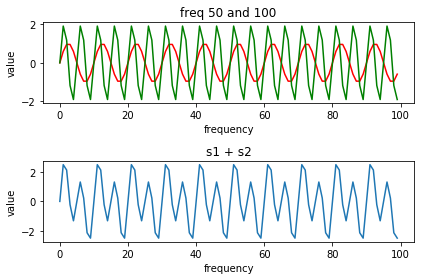

In [8]:
dt = 0.002 # 0.0005 as dt gets smaller the num samples increases
t = np.arange(0.0, 20.0, dt)
s1 = 1 * np.sin(2 * np.pi * 50 * t)
s2 = 2 * np.sin(2 * np.pi * 100 * t)
s3 = 3 * np.sin(2 * np.pi * 150 * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
# fig, ax1 = plt.subplots()
plt.subplot(2, 1, 1) # nrow, ncol, place in grid
plt.plot(s1[0:100], 'r')
plt.plot(s2[0:100], 'g') 
plt.xlabel("frequency")
plt.ylabel("value")
plt.title("freq 50 and 100")

plt.subplot(2,1,2) # nrow, ncol, place in grid
plt.plot(s1[0:100] + s2[0:100]) 
plt.xlabel("frequency")
plt.ylabel("value")
plt.title("s1 + s2")

plt.tight_layout() # adjust so that labels do not over lap

plt.show()

In [ ]:
fig = plt.figure()

s1_s2 = s1 + s2
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency
noverlap=900

# ax1 = plt.subplot(211)
# plt.plot(t, s1_s2)


# plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(s1_s2, NFFT=NFFT, Fs=Fs, 
                                    noverlap=noverlap, scale='linear')
fig.colorbar(im)
plt.show()
print("num windows (len(t) - NFFT)/noverlap = ", (len(t) - NFFT)/noverlap)
print("scale='linear'\nintensity of freq 100 should be twice intensity of freq 50 ???")

## Reverse engineer graph_spectorgram() using simple sin waves

In [ ]:
size = 201
x = np.linspace(-np.pi, np.pi, size)
sin_x = np.sin(x)
sin_2x = sin_x * 2
sin_f2x = np.sin(x * 2)
sin_f3x = np.sin(x * 3)
sin_f100x = np.sin(x * 100)

plt.plot(sin_x)
plt.plot(sin_2x, 'r')
plt.plot(sin_f2x, 'g')
plt.plot(sin_f3x, 'k') # black
plt.show()

In [ ]:
plt.plot(sin_f2x + sin_f3x)

### <span style="color:red">use arrange</span>
use arange so that we have multiple windows

In [ ]:
def graph_spectrogram(data, nfft=256, fs=8000, noverlap=128,
                     title=''):
    '''
    Calculate and plot spectrogram for a wav audio file
    
    arguments
        nfft     = The number of data points used in each block for the 
                    FFT. A power 2 is most efficient. I.E. the Length of 
                    each window segment
        fs       = 8000 # Sampling frequencies
        fs       = The sampling frequency (samples per time unit). It is
                    used to calculate the Fourier frequencies, freqs, 
                    in cycles per time unit. The default value is ???.
        noverlap = The number of points of overlap between blocks. 
                    The default value is 128.
        title    = string title
        
    return ppx
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('time steps')
    ax.set_ylabel('frequence')
    
# Pxx is the segments x freqs array of instantaneous power,
# freqs is the frequency vector,
# bins are the centers of the time bins in which the power is computed,
# im is the matplotlib.image.AxesImage instance

#                                         scale='linear',    
    pxx, freqs, bins, im = plt.specgram(data, nfft, fs, 
                                        scale='linear',     
#                                         scale_by_freq=True,
                                        noverlap = noverlap)
    fig.colorbar(im).set_label('Intensity [scale?]')
    
    print("pxx.shape", pxx.shape)
    print("freqs.shape:",freqs.shape)
    print("freqs\n", freqs)
    
    return pxx

In [ ]:
nfft = size # window length
fs = 2 * np.pi / size # sample freq 
noverlap = 0 #10 #2

In [ ]:
pxx = graph_spectrogram(sin_f2x + sin_f100x, nfft=nfft, fs=fs, 
                        noverlap=noverlap)

In [ ]:
# pxx = graph_spectrogram(sin_x, nfft=nfft, fs=fs, noverlap=noverlap, 
#                         title='sin_x')

In [ ]:
# pxx = graph_spectrogram(sin_2x, nfft=nfft, fs=fs, noverlap=noverlap)

In [ ]:
# pxx = graph_spectrogram(sin_f2x, nfft=nfft, fs=fs, noverlap=noverlap)

In [ ]:
# pxx = graph_spectrogram(sin_f3x, nfft=nfft, fs=fs, noverlap=noverlap)

In [ ]:
# pxx = graph_spectrogram(sin_f3x + sin_f100x, nfft=nfft, fs=fs, 
#                         noverlap=noverlap)

In [ ]:
# # pxx = graph_spectrogram(sin_f3x, nfft=nfft, fs=fs, noverlap=noverlap)
# fig = plt.figure()
# pxx, freqs, bins, im = plt.specgram(sin_f3x, nfft, fs, noverlap=noverlap)
# fig.colorbar(im).set_label('Intensity [dB]')
# print("input: len(data):{} nfft:{} fs:{} noverlap:{}".format(size, nfft, fs, noverlap))
# print( "specturm pxx.shape", pxx.shape)
# print( "specturm[:,1:5]\n", pxx[:,1:5])
# print("freqs.shape", freqs.shape)
# print("freqs\n", freqs)
# print("bins.shape", bins.shape)
# print("bins\n", bins)

In [ ]:
# # pxx = graph_spectrogram(sin_x, nfft=nfft, fs=fs, noverlap=noverlap)
# pxx, freqs, bins, im = plt.specgram(sin_x, nfft, fs, noverlap=noverlap)
# print("input: len(data):{} nfft:{} fs:{} noverlap:{}".format(size, nfft, fs, noverlap))
# print( "pxx.shape", pxx.shape)

In [ ]:
# # pxx = graph_spectrogram(sin_2x, nfft=nfft, fs=fs, noverlap=noverlap)
# pxx, freqs, bins, im = plt.specgram(sin_2x, nfft, fs, noverlap=noverlap)
# print("input: len(data):{} nfft:{} fs:{} noverlap:{}".format(size, nfft, fs, noverlap))

In [ ]:
# # pxx = graph_spectrogram(sin_f2x, nfft=nfft, fs=fs, noverlap=noverlap)
# pxx, freqs, bins, im = plt.specgram(sin_f2x, nfft, fs, noverlap=noverlap)
# print("input: len(data):{} nfft:{} fs:{} noverlap:{}".format(size, nfft, fs, noverlap))
# print( "pxx.shape", pxx.shape)

In [ ]:
# size = 50
# s1 = np.ones( (1,size) ) * 1
# s3 = np.ones( (1,size) ) * 3
# s5 = np.ones( (1,size) ) * 5
# s7 = np.ones( (1,size) ) * 7

In [ ]:
# test_s1_s3 = s1 + s3